# Computer Vision

The branch of Computer Vision may sound daunting at first, at least that's how I felt when I was first introduced to it. I will do my best to simplify it and explain a lot of the concepts that confused me when I started. However, you might need some time to go over extra resources before diving into the code. I really recommend you familiarize yourself with how images work and the different image types so that the explanations and the code in this notebook make more sense.

Take a look at these:

- [What is an image file](https://docs.fileformat.com/image/)
- [What is a JPEG image](https://docs.fileformat.com/image/jpeg/)
- [A nice video explaining pixels and resolution](https://www.youtube.com/watch?v=wvb5oNuvBLU)
- [Understanding the different types of images](https://www.tutorialspoint.com/dip/types_of_images.htm)

### The goal of computer vision

The goal of computer vision is to derive meaningful information from digital images, videos or any other visual input and take actions or make recommendations based on that information. Common tasks of computer vision include:
   - Classifying images: These are tasks in which we identify features of an image and classify them based on common features or labels. For example classifying different items of clothes, or classifying images of cats and dogs.
   - Object Detection: These are tasks in which the goal is to identify objects. Commons scenarios for this type of CV include self-driving cars, face recognition in cameras or mobile devices, etc.

There are many more applications so feel free to research some on your own. For this notebook we will focus in creating a model that classifies different images of clothing.

### The Fashion MNIST data set

We will be working with the Fashion MNIST dataset from tensorflow. This dataset is a good dataset to start with because it has been processed and cleaned up so you can focus on doing ML and not spend too much time cleaning it. That won't always be the case in the real world, often times datasets don't come in the format that you desire, but for now it's more than enough.

From the [tensorflow offical site](https://www.tensorflow.org/datasets/catalog/fashion_mnist) we get this explanation - Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

The dataset looks like this:
<img src="../imgs/fashion_mnist-3.0.1.png">

From the image above, you can see that each item of clothing has a label (an integer from 0 - 9 that represents the class it belongs to). T-shirts have the label (0), Pullovers have the label (2), and so on.
<br>Each image is 28x28 pixels and since the images are in grayscale, our array has the shape (28x28x1).

### Downloading necessary libraries and dataset

Before running the next cell block, make sure you have these libraries installed in your local environment.

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
# This cell is used to access the datasets API from tensorflow
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
# We use the load_data() functino from the datasets Class from TF Splitting data into testing and training subsets
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 2s 1us/step


In [4]:
# set number of characters per row when printing
np.set_printoptions(linewidth=320)

### Looking at the pixels

The next cell shows what our image looks like and the values of each pixel. To help you understand it a little more:

- training_labels[index]. This line of code is accessing our labels array at the specified index and getting its value
- training_images[index]. To help you understand this line of code a little more, think of the variable training_images as a list containing an image at every index. Since an image is 28x28x1 pixels, when you print an image at any valid index, you will get an array with multiple columns and rows depending on the size of the image.

In [5]:
# Print the label and image
index = [0]
print(f'Label: {training_labels[index]}')
print(f'\nImage Pixel Array:\n {training_images[index]}')

Label: [9]

Image Pixel Array:
 [[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
  [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
  [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
  [  0   0   0   0   0   0   0   0   0  

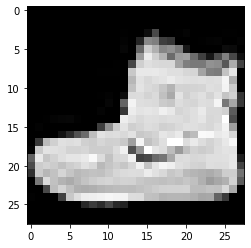

In [13]:
# visualize the image
plt.imshow((tf.squeeze(training_images[index])), cmap='gray')
plt.show()

### Normalizing pixels

From the cells above, you can see that our pixel values range from 0 - 255. This is not optimal for training our model so we want to convert them to values between 0-1. We do this by dividing each value by 255. The following cell does exactly that.

In [14]:
# Normalize the pixel values of the training and testing images
training_images = training_images / 255.0
test_images = test_images / 255.0

In [15]:
# Looking at our label and normalized and image
index = [0]
print(f'Label: {training_labels[index]}')
print(f'\nImage Pixel Array:\n {training_images[index]}')

Label: [9]

Image Pixel Array:
 [[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
  [0.         0.         0.     

### Building the model

In [16]:
# relu passes values greater than 0 to the next layer
# softmax takes a list of values and scales them so the sum of all elements will be equal to 1
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])